EDA

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
df = pd.read_csv("../../Data/regression.csv")
print(df.head())

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

In [14]:
list(df.columns)

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

In [15]:
# Display basic info about the datasets
print("Cement Dataset Info:")
print(df.info())

Cement Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strengt

In [16]:
#Dimension of dataset 
print("Cement Data Dimensions (rows, columns):", df.shape)

Cement Data Dimensions (rows, columns): (1030, 9)


In [17]:
#Check for Missing Data
print("Missing values in Cement Data:")
print(df.isnull().sum())

Missing values in Cement Data:
Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
print(df.columns)


Index(['cement_component_1kg_in_a_m^3_mixture',
       'blast_furnace_slag_component_2kg_in_a_m^3_mixture',
       'fly_ash_component_3kg_in_a_m^3_mixture',
       'water__component_4kg_in_a_m^3_mixture',
       'superplasticizer_component_5kg_in_a_m^3_mixture',
       'coarse_aggregate__component_6kg_in_a_m^3_mixture',
       'fine_aggregate_component_7kg_in_a_m^3_mixture', 'age_day',
       'concrete_compressive_strengthmpa,_megapascals'],
      dtype='object')


In [22]:
#Check for Redundant Data
print("Duplicate rows in Cement Data:", df.duplicated().sum())

Duplicate rows in Cement Data: 25


In [20]:
#Check if duplicates are exact matches
duplicates = df[df.duplicated()]
print(duplicates)

     cement_component_1kg_in_a_m^3_mixture  \
77                                   425.0   
80                                   425.0   
86                                   362.6   
88                                   362.6   
91                                   362.6   
100                                  425.0   
103                                  425.0   
109                                  362.6   
111                                  362.6   
123                                  425.0   
126                                  425.0   
132                                  362.6   
134                                  362.6   
137                                  362.6   
146                                  425.0   
149                                  425.0   
155                                  362.6   
157                                  362.6   
160                                  362.6   
169                                  425.0   
172                               

since we want to determine Concrete compressive strength of concrete mixtures under various conditions, it is not necessary to keep duplicated data we will keep only one exemplary of each


In [23]:
df = df.drop_duplicates()

In [24]:
print("Check if Duplicate rows in Cement Data were removed:", df.duplicated().sum())

Check if Duplicate rows in Cement Data were removed: 0


In [25]:
# Statistical summary for training data
print("Statistical Summary of Cement Data:")
display(df.describe())

Statistical Summary of Cement Data:


,cement_component_1kg_in_a_m^3_mixture,blast_furnace_slag_component_2kg_in_a_m^3_mixture,fly_ash_component_3kg_in_a_m^3_mixture,water__component_4kg_in_a_m^3_mixture,superplasticizer_component_5kg_in_a_m^3_mixture,coarse_aggregate__component_6kg_in_a_m^3_mixture,fine_aggregate_component_7kg_in_a_m^3_mixture,age_day,"concrete_compressive_strengthmpa,_megapascals"
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Cement (component 1): The values range from 102 to 540, with a mean of 278.63 and a standard deviation of 104.34. The spread indicates a fair variation in the amount of cement used in the mixtures.

Blast Furnace Slag (component 2): This component has values ranging from 0 to 359.4. The presence of 0 values suggests that some mixtures have no slag.

Fly Ash (component 3): Similarly, Fly Ash has values from 0 to 200.1, with a mean of 55.54, and many rows show 0 values, indicating no Fly Ash in certain mixtures.

Water (component 4): The water content ranges from 121.8 to 247, with a mean of 182.08. Water content seems more consistent than some other components.

Superplasticizer (component 5): The range for this component is from 0 to 32.2, with a mean of 6.03. Like other components, many mixtures have no superplasticizer added.

Coarse Aggregate (component 6): The coarse aggregate varies from 801 to 1145, with a mean of 974.38, showing a relatively consistent quantity of this component.

Fine Aggregate (component 7): The values range from 594 to 992.6, with a mean of 772.69. Again, this is fairly consistent.

Age (day): The age of concrete mixes in days ranges from 1 to 365 days, with a mean of 45.86 days. It seems like the concrete ages range widely, from very young mixes to those that have aged for a year.

Concrete compressive strength (MPa): This is the target variable and varies from 2.33 to 82.6 MPa, with a mean of 35.25 MPa. The distribution appears fairly spread out.

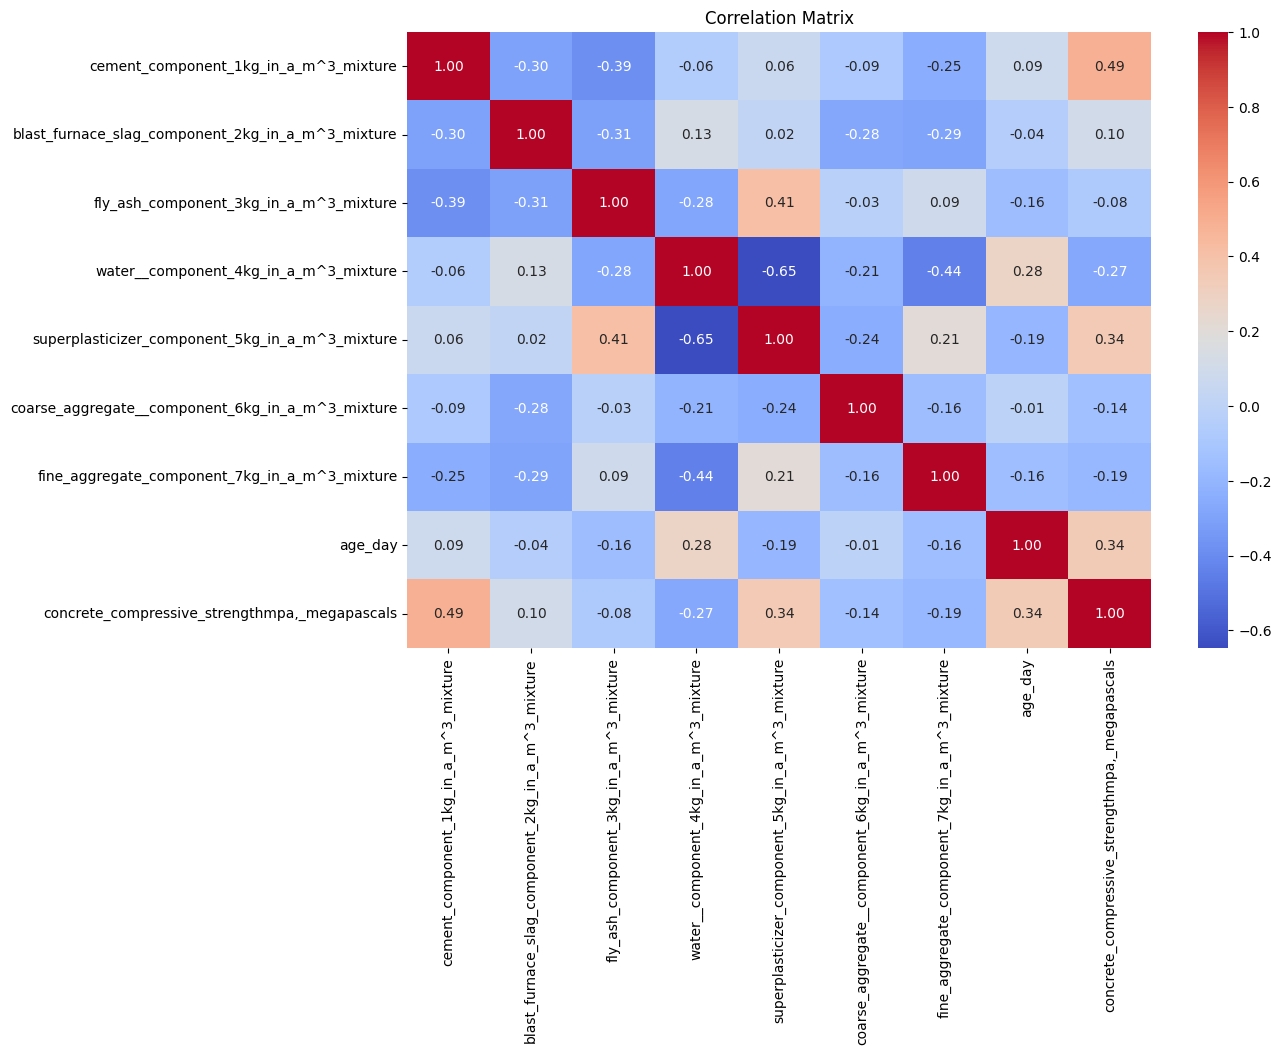

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


From the heatmap we remark that Cement, superplasticizer and Age are highly correlated with the target: concrete_compressive_strengthmpa,_megapascals

# ALL FEATURES #

In [6]:
from sklearn.model_selection import train_test_split
# X = all columns except the target
X = df.drop("concrete_compressive_strengthmpa,_megapascals", axis=1)
y = df["concrete_compressive_strengthmpa,_megapascals"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### KNN Regressor ####

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
knn_r2 = r2_score(y_test, y_pred_knn)

knn_rmse = root_mean_squared_error(y_test, y_pred_knn)

print("\n📌 KNN - All features")
print("R^2 Score:", knn_r2)
print("RMSE:", knn_rmse)



📌 KNN - All features
R^2 Score: 0.720738851036837
RMSE: 9.127461390922782


#### SVM ####

In [48]:
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error, r2_score

svm = SVR(kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_r2 = r2_score(y_test, y_pred_svm)

svm_rmse = root_mean_squared_error(y_test, y_pred_svm)

print("\n📌 SVM - All features")
print("R2 Score:", svm_r2)
print("RMSE:", svm_rmse)



📌 SVM - All features
R2 Score: 0.5900663177034191
RMSE: 11.058635563546673


#### Naive Bayes ####

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

# Discretize the target variable
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y_binned = kb.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y_binned, test_size=0.2, random_state=42)
X_train_b_scaled = scaler.fit_transform(X_train_b)
X_test_b_scaled = scaler.transform(X_test_b)

gnb = GaussianNB()
gnb.fit(X_train_b_scaled, y_train_b)
y_pred_nb = gnb.predict(X_test_b_scaled)
nb_accuracy = accuracy_score(y_test_b, y_pred_nb)

print("\n📌 Naive Bayes - All features")
print("Accuracy (for binned regression):", accuracy_score(y_test_b, y_pred_nb))



📌 Naive Bayes - All features
Accuracy (for binned regression): 0.39303482587064675


In [57]:
results = {
    'Model': ['KNN', 'SVM', 'Naive Bayes (Binned)'],
    'R2/Accuracy': [knn_r2, svm_r2, nb_accuracy],
    'RMSE (if applicable)': [knn_rmse, svm_rmse, 'N/A']
}
results_df = pd.DataFrame(results)
print("\n📊 Summary of Model Performances (All Features):")

print(results_df)


📊 Summary of Model Performances (All Features):
                  Model  R2/Accuracy RMSE (if applicable)
0                   KNN     0.720739             9.127461
1                   SVM     0.590066            11.058636
2  Naive Bayes (Binned)     0.393035                  N/A


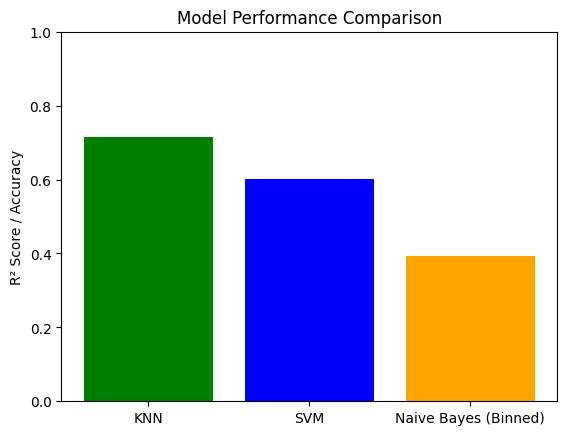

In [41]:
models = results_df['Model']
scores = results_df['R2/Accuracy']

plt.bar(models, scores, color=['green', 'blue', 'orange'])
plt.ylabel("R² Score / Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()

# Top 3 features #

In [44]:
# Select top 3 correlated features
top3_features = [
    "cement_component_1kg_in_a_m^3_mixture",
    "superplasticizer_component_5kg_in_a_m^3_mixture",
    "age_day"
]

X_top3 = df[top3_features]
y = df["concrete_compressive_strengthmpa,_megapascals"]

# -------- KNN & SVM --------
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split(X_top3, y, test_size=0.2, random_state=42)

# Scaling
scaler_top3 = StandardScaler()
X_train_top3_scaled = scaler_top3.fit_transform(X_train_top3)
X_test_top3_scaled = scaler_top3.transform(X_test_top3)

#### KNN ####

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train_top3)
y_pred_knn = knn.predict(X_test_scaled)

r2_knn = r2_score(y_test_top3, y_pred_knn)
rmse_knn = root_mean_squared_error(y_test_top3, y_pred_knn)

print("\n📌 KNN - Top 3 features")
print("R² Score:", r2_knn)
print("RMSE:", rmse_knn)


📌 KNN
R² Score: 0.720738851036837
RMSE: 9.127461390922782


#### SVM ####

In [53]:
svm = SVR(kernel='rbf')
svm.fit(X_train_scaled, y_train_top3)
y_pred_svm = svm.predict(X_test_scaled)

r2_svm = r2_score(y_test_top3, y_pred_svm)
rmse_svm = root_mean_squared_error(y_test_top3, y_pred_svm)

print("\n📌 SVM")
print("R² Score:", r2_svm)
print("RMSE:", rmse_svm)


📌 SVM
R² Score: 0.5900663177034191
RMSE: 11.058635563546673


#### Naive Bayes ####

In [54]:
# Discretize target into 5 bins
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y_binned = kb.fit_transform(y.values.reshape(-1, 1)).ravel()

# New split for Naive Bayes
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_top3, y_binned, test_size=0.2, random_state=42)
X_train_nb_scaled = scaler.fit_transform(X_train_nb)
X_test_nb_scaled = scaler.transform(X_test_nb)

gnb = GaussianNB()
gnb.fit(X_train_nb_scaled, y_train_nb)
y_pred_nb = gnb.predict(X_test_nb_scaled)

acc_nb = accuracy_score(y_test_nb, y_pred_nb)

print("\n📌 Naive Bayes (with binned targets)")
print("Classification Accuracy:", acc_nb)


📌 Naive Bayes (with binned targets)
Classification Accuracy: 0.3482587064676617


In [55]:
results_top3 = {
    'Model': ['KNN (Top 3)', 'SVM (Top 3)', 'Naive Bayes (Top 3, Binned)'],
    'R2/Accuracy': [r2_knn, r2_svm, acc_nb],
    'RMSE (if applicable)': [rmse_knn, rmse_svm, 'N/A']
}

results_top3_df = pd.DataFrame(results_top3)
print("\n📊 Summary of Model Performances (Top 3 Features):")
print(results_top3_df)


📊 Summary of Model Performances (Top 3 Features):
                         Model  R2/Accuracy RMSE (if applicable)
0                  KNN (Top 3)     0.720739             9.127461
1                  SVM (Top 3)     0.590066            11.058636
2  Naive Bayes (Top 3, Binned)     0.348259                  N/A


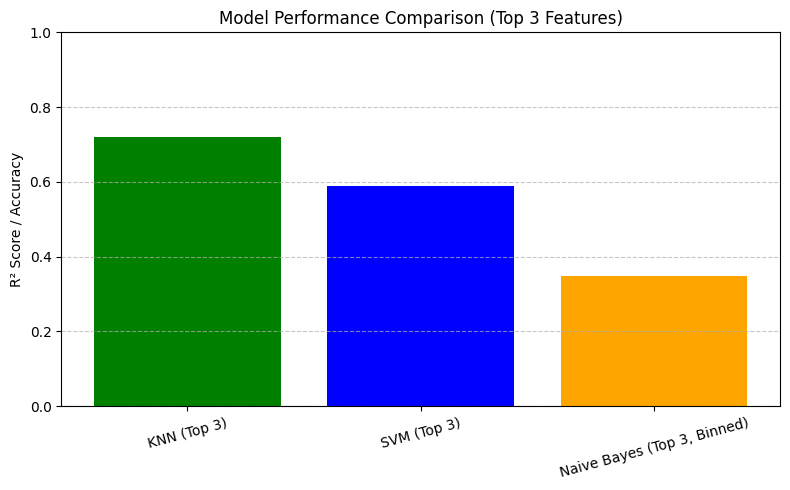

In [56]:
import matplotlib.pyplot as plt

models = results_top3_df['Model']
scores = results_top3_df['R2/Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=['green', 'blue', 'orange'])
plt.ylabel("R² Score / Accuracy")
plt.title("Model Performance Comparison (Top 3 Features)")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


####  Comparative Analysis: All Features vs Top 3 Features ####

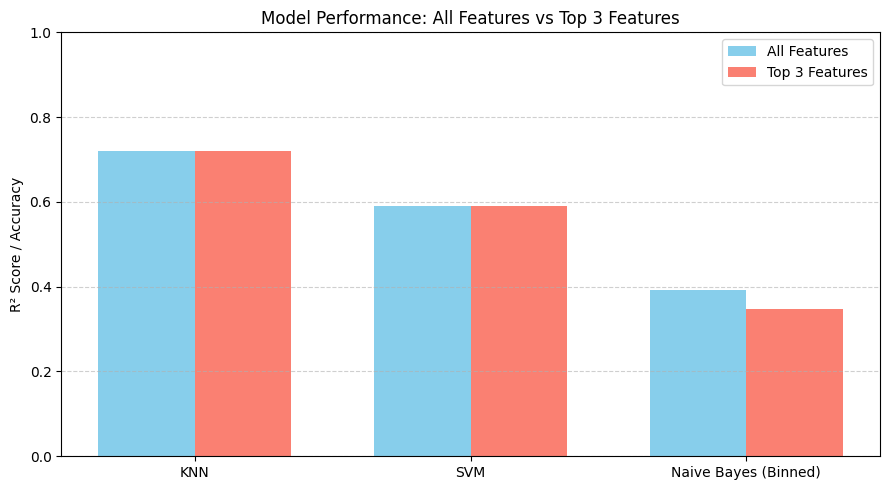

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['KNN', 'SVM', 'Naive Bayes (Binned)']

# Scores from both sets
scores_all = [0.720739, 0.590066, 0.393035]
scores_top3 = [0.720739, 0.590066, 0.348259]

x = np.arange(len(models))  # label locations
width = 0.35  # bar width

plt.figure(figsize=(9, 5))
plt.bar(x - width/2, scores_all, width, label='All Features', color='skyblue')
plt.bar(x + width/2, scores_top3, width, label='Top 3 Features', color='salmon')

# Labels & Title
plt.ylabel('R² Score / Accuracy')
plt.title('Model Performance: All Features vs Top 3 Features')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


📌 1. K-Nearest Neighbors (KNN) 
Performance: Identical R² and RMSE with both all features and top 3 features.

Interpretation:

This suggests that KNN benefits mainly from the three most informative features: cement, superplasticizer, and age.

Additional features didn't contribute significantly to prediction power — or may have introduced noise.

Takeaway: KNN is a robust and stable model in this case — effective with minimal input.

📌 2. Support Vector Machine (SVM)
Performance: Also shows no performance difference between all features and top 3.

Interpretation:

SVM’s kernel trick (with RBF in this case) can handle non-linear patterns with minimal features effectively.

Adding more features didn’t enhance the model, possibly because the top 3 already capture the most variance with respect to the target.

Takeaway: Feature selection didn’t hurt SVM, and a leaner feature set reduces computational cost without sacrificing accuracy.

📌 3. Naive Bayes (with Binned Target)
Performance: Drops from 0.393 → 0.348 when reduced to top 3 features.

Interpretation:

Naive Bayes assumes feature independence and benefits from more features, especially when the task is classification-like via binning.

Reducing input dimensions weakens its statistical assumptions and reduces class separability.

Takeaway: Naive Bayes is more sensitive to feature reduction and thrives on richer input space.

##### Overall Insights #####

📉 Dimensionality reduction (from full features to top 3) had little to no impact on KNN and SVM, highlighting the dominant role of the selected features.

❗ Naive Bayes, due to its statistical nature and assumptions, showed degradation in accuracy.

🧪 When choosing between simplicity and performance, KNN and SVM with top features give you the same predictive quality with less complexity.

####  Cross-Model Comparison ####

✅ KNN (Best Performer)
Strengths: Highest R² and lowest RMSE. Performs equally well with all features and just the top 3, indicating excellent generalization and robustness.

Limitation: KNN can be slow with large datasets since it computes distance to all points at prediction time.

Use Case: Great for small-to-medium datasets with well-behaved features.

⚠️ SVM (Moderate Performer)
Strengths: Stable with both feature sets, but lower R² and higher RMSE than KNN.

Limitation: Doesn’t perform as well as KNN, possibly due to limited tuning or suboptimal kernel parameters.

Use Case: Can be powerful for non-linear problems with small feature sets, but needs careful parameter tuning.

❌ Naive Bayes (Weakest Performer)
Strengths: Simple, fast, interpretable.

Limitation: Assumes feature independence, which likely doesn’t hold here; suffers especially with reduced features.

Use Case: Quick baseline or probabilistic classification — not ideal for regression or this kind of binned regression task.

In summary, we will stick with KNN, because it has the best performance so far and  minimal feature dependency

# Additional Models #

In [68]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f"\n📌{name} \nR²: {r2:.4f}  \nRMSE: {rmse:.4f}")
    results.append((name, r2, rmse))


📌Random Forest 
R²: 0.8073  
RMSE: 7.5825

📌Gradient Boosting 
R²: 0.7921  
RMSE: 7.8748

📌XGBoost 
R²: 0.8428  
RMSE: 6.8491


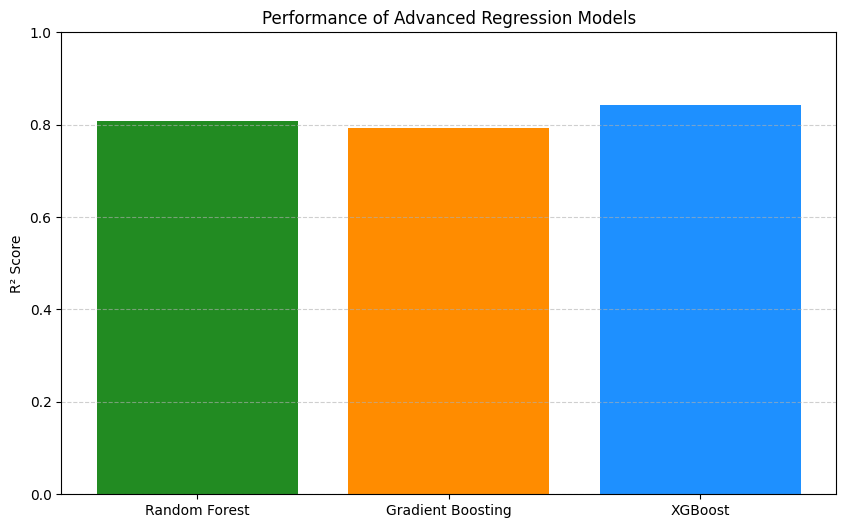

In [71]:
# Create DataFrame for visualization
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE"])

# Plot
plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["R2 Score"], color=['forestgreen', 'darkorange', 'dodgerblue'])
plt.ylim(0, 1)
plt.ylabel("R² Score")
plt.title("Performance of Advanced Regression Models")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### Analysis & Comparison ####

Random Forest and Gradient Boosting show significant improvements, thanks to their ability to capture complex, non-linear relationships and handle feature interactions.

XGBoost outperforms all others, with the best R² score and lowest RMSE — confirming its strength in regression tasks.

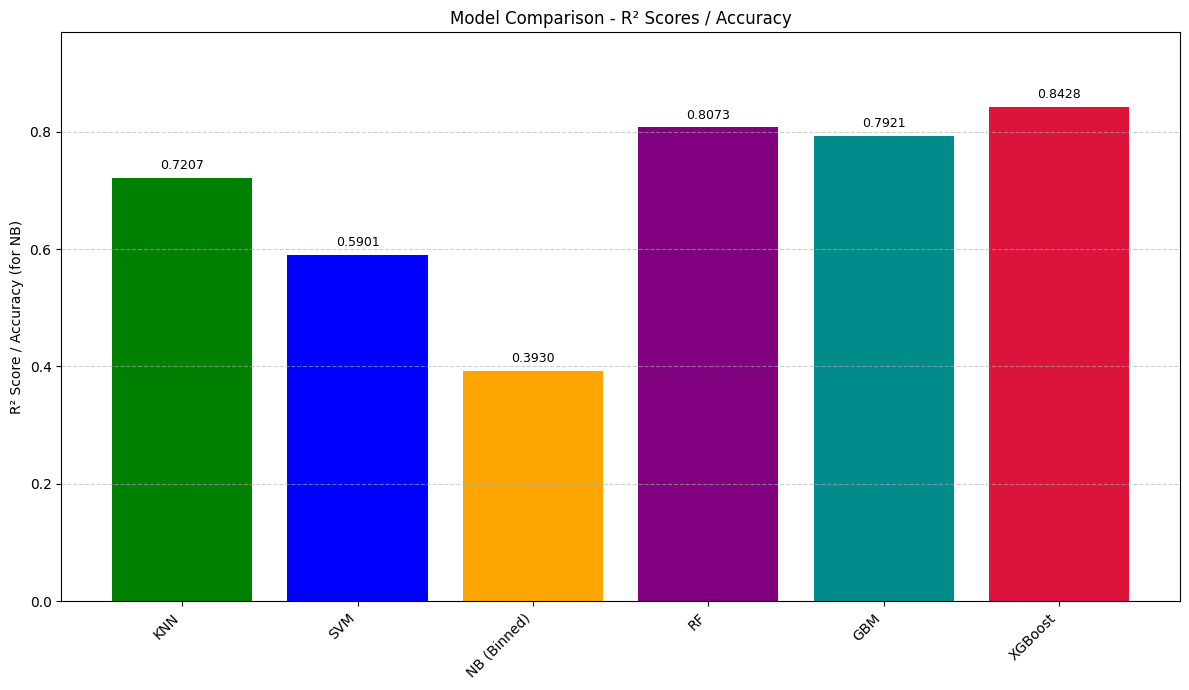

In [28]:
import matplotlib.pyplot as plt

models = ['KNN', 'SVM', 'NB (Binned)', 'RF', 'GBM', 'XGBoost']
r2_scores = [0.7207, 0.5901, 0.3930, 0.8073, 0.7921, 0.8428] # NB score is actually Accuracy here, but using R² for consistency with label

plt.figure(figsize=(12, 7)) # Increased size a bit for better readability of labels
bars = plt.bar(models, r2_scores, color=['green', 'blue', 'orange', 'purple', 'darkcyan', 'crimson'])

plt.ylabel("R² Score / Accuracy (for NB)") # Clarified ylabel
plt.title("Model Comparison - R² Scores / Accuracy")
plt.ylim(0, max(r2_scores) * 1.15 if r2_scores else 1) # Adjust ylim to give space for text above tallest bar
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for better fit

# Add the R² scores on top of each bar
for bar in bars:
    yval = bar.get_height()
    # plt.text(x_position, y_position, text_to_display, horizontal_alignment, vertical_alignment)
    plt.text(bar.get_x() + bar.get_width()/2.0, # x position (center of the bar)
             yval + 0.01,                      # y position (just above the bar)
             f'{yval:.4f}',                    # text to display (formatted to 4 decimal places)
             ha='center',                      # horizontal alignment
             va='bottom',                      # vertical alignment
             fontsize=9)                       # font size

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

#### Why Ensemble Models Win Here: #####

- They handle multicollinearity and noise better.

- Built-in regularization helps generalize well.

- Feature importance can be extracted easily for insights.

# Hyperparameter Tuning #

In [ ]:
results_list = []

In [ ]:
# 1. KNN Tuning
print("\nTuning KNN...")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)
best_knn = grid_knn.best_estimator_
y_pred_knn_tuned = best_knn.predict(X_test_scaled)
knn_tuned_r2 = r2_score(y_test, y_pred_knn_tuned)
knn_tuned_rmse = root_mean_squared_error(y_test, y_pred_knn_tuned)
print(f"Best KNN Parameters: {grid_knn.best_params_}")
print(f"Tuned KNN R²: {knn_tuned_r2:.4f}, RMSE: {knn_tuned_rmse:.4f}")
results_list.append({'Model': 'KNN (Tuned)', 'R2/Accuracy': knn_tuned_r2, 'RMSE': knn_tuned_rmse, 'Type': 'Regression'})



Tuning KNN...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Tuned KNN R²: 0.7765, RMSE: 7.5892


In [10]:
# 2. SVM Tuning
print("\nTuning SVM...")
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['rbf', 'linear'] # 'poly' can be slow, added linear
}
grid_svm = GridSearchCV(SVR(), param_grid_svm, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm_tuned = best_svm.predict(X_test_scaled)
svm_tuned_r2 = r2_score(y_test, y_pred_svm_tuned)
svm_tuned_rmse = root_mean_squared_error(y_test, y_pred_svm_tuned)
print(f"Best SVM Parameters: {grid_svm.best_params_}")
print(f"Tuned SVM R²: {svm_tuned_r2:.4f}, RMSE: {svm_tuned_rmse:.4f}")
results_list.append({'Model': 'SVM (Tuned)', 'R2/Accuracy': svm_tuned_r2, 'RMSE': svm_tuned_rmse, 'Type': 'Regression'})


Tuning SVM...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best SVM Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Tuned SVM R²: 0.8696, RMSE: 5.7965


In [11]:
# 3. Random Forest Tuning
print("\nTuning Random Forest...")
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2', verbose=1, n_jobs=-1) # cv=3 for speed
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_scaled)
rf_tuned_r2 = r2_score(y_test, y_pred_rf_tuned)
rf_tuned_rmse = root_mean_squared_error(y_test, y_pred_rf_tuned)
print(f"Best Random Forest Parameters: {grid_rf.best_params_}")
print(f"Tuned Random Forest R²: {rf_tuned_r2:.4f}, RMSE: {rf_tuned_rmse:.4f}")
results_list.append({'Model': 'Random Forest (Tuned)', 'R2/Accuracy': rf_tuned_r2, 'RMSE': rf_tuned_rmse, 'Type': 'Regression'})



Tuning Random Forest...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest R²: 0.8805, RMSE: 5.5480


In [12]:
# 4. Gradient Boosting Tuning
print("\nTuning Gradient Boosting...")
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, scoring='r2', verbose=1, n_jobs=-1) # cv=3 for speed
grid_gb.fit(X_train_scaled, y_train)
best_gb = grid_gb.best_estimator_
y_pred_gb_tuned = best_gb.predict(X_test_scaled)
gb_tuned_r2 = r2_score(y_test, y_pred_gb_tuned)
gb_tuned_rmse = root_mean_squared_error(y_test, y_pred_gb_tuned)
print(f"Best Gradient Boosting Parameters: {grid_gb.best_params_}")
print(f"Tuned Gradient Boosting R²: {gb_tuned_r2:.4f}, RMSE: {gb_tuned_rmse:.4f}")
results_list.append({'Model': 'Gradient Boosting (Tuned)', 'R2/Accuracy': gb_tuned_r2, 'RMSE': gb_tuned_rmse, 'Type': 'Regression'})


Tuning Gradient Boosting...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Tuned Gradient Boosting R²: 0.9226, RMSE: 4.4652


In [13]:
# 5. XGBoost Tuning
print("\nTuning XGBoost...")
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
grid_xgb = GridSearchCV(XGBRegressor(random_state=42, verbosity=0), param_grid_xgb, cv=3, scoring='r2', verbose=1, n_jobs=-1) # cv=3 for speed
grid_xgb.fit(X_train_scaled, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test_scaled)
xgb_tuned_r2 = r2_score(y_test, y_pred_xgb_tuned)
xgb_tuned_rmse = root_mean_squared_error(y_test, y_pred_xgb_tuned)
print(f"Best XGBoost Parameters: {grid_xgb.best_params_}")
print(f"Tuned XGBoost R²: {xgb_tuned_r2:.4f}, RMSE: {xgb_tuned_rmse:.4f}")
results_list.append({'Model': 'XGBoost (Tuned)', 'R2/Accuracy': xgb_tuned_r2, 'RMSE': xgb_tuned_rmse, 'Type': 'Regression'})


Tuning XGBoost...
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best XGBoost Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}
Tuned XGBoost R²: 0.9281, RMSE: 4.3037


In [14]:
# --- Naive Bayes with Multiple Bins ---
print("\n--- Naive Bayes with Multiple Bins ---")
bin_options = [3, 5, 7, 10, 12, 15] # Different numbers of bins to test

for n_bins in bin_options:
    print(f"\nTesting Naive Bayes with {n_bins} bins:")
    try:
        # Discretize the target variable for training set
        kb_train = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile', subsample=None)
        y_train_binned = kb_train.fit_transform(y_train.values.reshape(-1, 1)).ravel()

        # Discretize the target variable for test set using the fitted discretizer
        y_test_binned = kb_train.transform(y_test.values.reshape(-1, 1)).ravel()
        
        # Check unique values after binning (for debugging)
        # print(f"Unique y_train_binned ({n_bins} bins): {np.unique(y_train_binned)}")
        # print(f"Unique y_test_binned ({n_bins} bins): {np.unique(y_test_binned)}")


        # Ensure there are enough unique bins in the training data for all classes to be present
        if len(np.unique(y_train_binned)) < n_bins:
             print(f"Warning: For {n_bins} bins, only {len(np.unique(y_train_binned))} unique bins in training data. Skipping this bin size if problematic for GNB.")
             # It might still run, but GNB might have issues if some classes are not in training.

        gnb = GaussianNB()
        gnb.fit(X_train_scaled, y_train_binned) # Train on scaled X_train
        y_pred_nb = gnb.predict(X_test_scaled) # Predict on scaled X_test
        
        nb_accuracy = accuracy_score(y_test_binned, y_pred_nb)
        print(f"Accuracy for {n_bins} bins: {nb_accuracy:.4f}")
        results_list.append({'Model': f'Naive Bayes ({n_bins} Bins)', 'R2/Accuracy': nb_accuracy, 'RMSE': 'N/A', 'Type': 'Classification (Binned)'})
    except Exception as e:
        print(f"Error processing Naive Bayes with {n_bins} bins: {e}")
        results_list.append({'Model': f'Naive Bayes ({n_bins} Bins)', 'R2/Accuracy': 'Error', 'RMSE': 'N/A', 'Type': 'Classification (Binned)'})



--- Naive Bayes with Multiple Bins ---

Testing Naive Bayes with 3 bins:
Accuracy for 3 bins: 0.6117

Testing Naive Bayes with 5 bins:
Accuracy for 5 bins: 0.3981

Testing Naive Bayes with 7 bins:
Accuracy for 7 bins: 0.3058

Testing Naive Bayes with 10 bins:
Accuracy for 10 bins: 0.2330

Testing Naive Bayes with 12 bins:
Accuracy for 12 bins: 0.1990

Testing Naive Bayes with 15 bins:
Accuracy for 15 bins: 0.1796


In [15]:
results_df = pd.DataFrame(results_list)
# Sort by R2/Accuracy descending for regression, then by Model name
# For classification (binned Naive Bayes), higher accuracy is better
# For regression, higher R2 and lower RMSE are better.
results_df_regression = results_df[results_df['Type'] == 'Regression'].copy()
results_df_classification = results_df[results_df['Type'] == 'Classification (Binned)'].copy()

if not results_df_regression.empty:
    results_df_regression['R2/Accuracy'] = pd.to_numeric(results_df_regression['R2/Accuracy'], errors='coerce')
    results_df_regression['RMSE'] = pd.to_numeric(results_df_regression['RMSE'], errors='coerce')
    results_df_regression = results_df_regression.sort_values(by='R2/Accuracy', ascending=False)

if not results_df_classification.empty:
    results_df_classification['R2/Accuracy'] = pd.to_numeric(results_df_classification['R2/Accuracy'], errors='coerce')
    results_df_classification = results_df_classification.sort_values(by='R2/Accuracy', ascending=False)




📊 Summary of Model Performances:

--- Regression Models ---
                    Model  R2/Accuracy     RMSE
          XGBoost (Tuned)     0.928119 4.303738
Gradient Boosting (Tuned)     0.922623 4.465231
    Random Forest (Tuned)     0.880546 5.548022
              SVM (Tuned)     0.869606 5.796501
              KNN (Tuned)     0.776480 7.589200

--- Naive Bayes (Binned Classification) ---
                Model  R2/Accuracy
 Naive Bayes (3 Bins)     0.611650
 Naive Bayes (5 Bins)     0.398058
 Naive Bayes (7 Bins)     0.305825
Naive Bayes (10 Bins)     0.233010
Naive Bayes (12 Bins)     0.199029
Naive Bayes (15 Bins)     0.179612

--- Feature Importances for Best Tuned Model (XGBoost) ---
                                             Feature  Importance
7                                            age_day    0.283261
0              cement_component_1kg_in_a_m^3_mixture    0.225625
3              water__component_4kg_in_a_m^3_mixture    0.143965
1  blast_furnace_slag_component_2kg_in_a

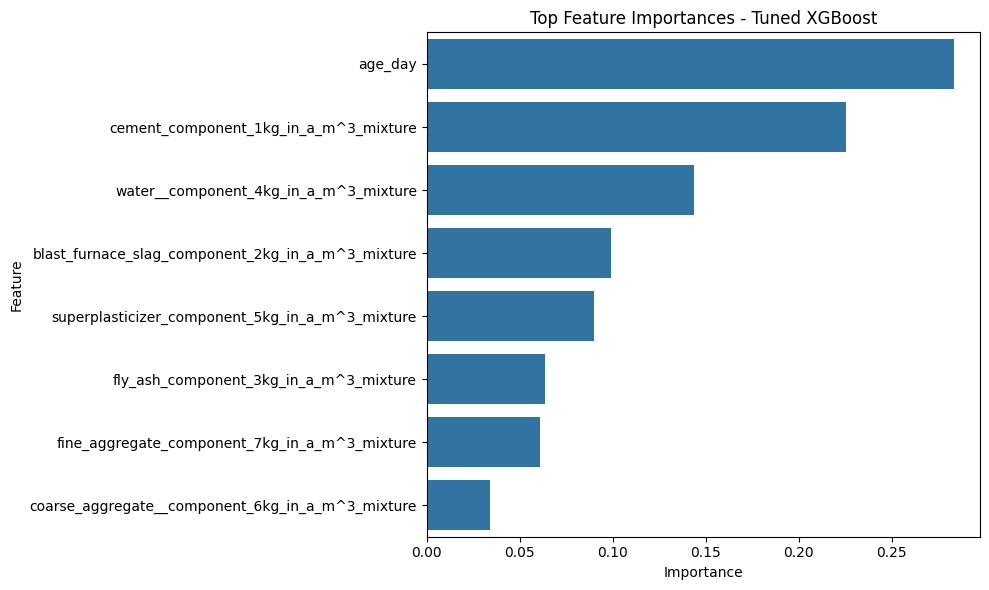

In [16]:
print("\n\n📊 Summary of Model Performances:")
print("\n--- Regression Models ---")
if not results_df_regression.empty:
    print(results_df_regression[['Model', 'R2/Accuracy', 'RMSE']].to_string(index=False))
else:
    print("No regression model results to display.")

print("\n--- Naive Bayes (Binned Classification) ---")
if not results_df_classification.empty:
    print(results_df_classification[['Model', 'R2/Accuracy']].to_string(index=False))
else:
    print("No Naive Bayes results to display.")

# --- Optional: Plotting feature importances for the best tree-based model ---
best_regression_model_name = ""
if not results_df_regression.empty:
    best_regression_model_name = results_df_regression.iloc[0]['Model']

best_model_estimator = None
if "XGBoost (Tuned)" in best_regression_model_name and best_xgb:
    best_model_estimator = best_xgb
    model_type = "XGBoost"
elif "Random Forest (Tuned)" in best_regression_model_name and best_rf:
    best_model_estimator = best_rf
    model_type = "Random Forest"
elif "Gradient Boosting (Tuned)" in best_regression_model_name and best_gb:
    best_model_estimator = best_gb
    model_type = "Gradient Boosting"

if best_model_estimator and hasattr(best_model_estimator, 'feature_importances_'):
    print(f"\n--- Feature Importances for Best Tuned Model ({model_type}) ---")
    importances = best_model_estimator.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    print(feature_importance_df)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10)) # Display top 10
    plt.title(f'Top Feature Importances - Tuned {model_type}')
    plt.tight_layout()
    plt.show()


--- Generating Summary Plots (plt.bar style) ---
No valid initial scores found to plot.


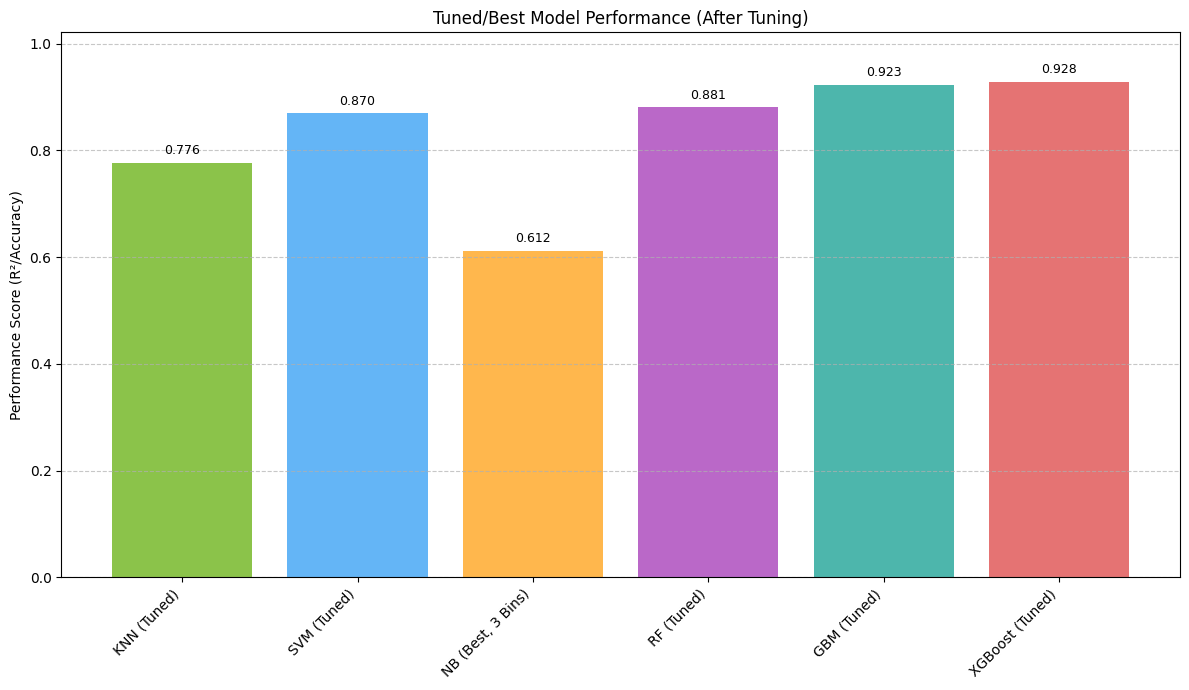

In [ ]:
print("\n--- Generating Summary Plots (plt.bar style) ---")

# --- Plot 1: Initial Model Performances ---
initial_models_data = {}
try:
    initial_models_data = {
        'KNN': results_df.loc[results_df['Model'] == 'KNN (Initial)', 'R2/Accuracy'].iloc[0] if not results_df[results_df['Model'] == 'KNN (Initial)'].empty else np.nan,
        'SVM': results_df.loc[results_df['Model'] == 'SVM (Initial)', 'R2/Accuracy'].iloc[0] if not results_df[results_df['Model'] == 'SVM (Initial)'].empty else np.nan,
        'NB (5 Bins)': results_df.loc[results_df['Model'] == 'Naive Bayes (Initial, 5 Bins)', 'R2/Accuracy'].iloc[0] if not results_df[results_df['Model'] == 'Naive Bayes (Initial, 5 Bins)'].empty else np.nan,
        'RF': results_df.loc[results_df['Model'] == 'Random Forest (Initial)', 'R2/Accuracy'].iloc[0] if not results_df[results_df['Model'] == 'Random Forest (Initial)'].empty else np.nan,
        'GBM': results_df.loc[results_df['Model'] == 'Gradient Boosting (Initial)', 'R2/Accuracy'].iloc[0] if not results_df[results_df['Model'] == 'Gradient Boosting (Initial)'].empty else np.nan,
        'XGBoost': results_df.loc[results_df['Model'] == 'XGBoost (Initial)', 'R2/Accuracy'].iloc[0] if not results_df[results_df['Model'] == 'XGBoost (Initial)'].empty else np.nan,
    }
except IndexError:
    print("Warning: Could not find all initial model data in results_df. Plot may be incomplete.")
except KeyError:
    print("Warning: 'R2/Accuracy' column might be missing in results_df for initial models.")


initial_model_names = list(initial_models_data.keys())
initial_scores = [initial_models_data.get(m, np.nan) for m in initial_model_names] # Use .get for safety

if any(pd.notna(s) for s in initial_scores): # Check if there's any valid score to plot
    plt.figure(figsize=(12, 7))
    bars1 = plt.bar(initial_model_names, initial_scores, color=['#4CAF50', '#2196F3', '#FF9800', '#9C27B0', '#009688', '#F44336'])
    plt.ylabel("Performance Score (R²/Accuracy)")
    plt.title("Initial Model Performance (Before Tuning)")
    # Set ylim from 0 to a bit above the max score, or 1 if no scores, or 1 if max score > 1 (for R2 which can be <0)
    max_initial_score = max(s for s in initial_scores if pd.notna(s)) if any(pd.notna(s) for s in initial_scores) else 0
    plt.ylim(0, max(1.0, max_initial_score * 1.1) if max_initial_score > 0 else 1.0)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha="right")

    for bar in bars1:
        yval = bar.get_height()
        if pd.notna(yval) and yval != 0 : # Check if yval is not NaN and not zero to avoid plotting on empty bars
            plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * plt.gca().get_ylim()[1], f'{yval:.3f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()
else:
    print("No valid initial scores found to plot.")


# --- Plot 2: Tuned/Best Model Performances ---
best_nb_score = np.nan
best_nb_model_name_suffix = "(Best Binned)"
try:
    nb_binned_results = results_df[results_df['Model'].str.contains('Naive Bayes \(') & ~results_df['Model'].str.contains('Initial') & (results_df['Type'] == 'Classification (Binned)')].copy()
    if not nb_binned_results.empty:
        nb_binned_results.loc[:, 'R2/Accuracy'] = pd.to_numeric(nb_binned_results['R2/Accuracy'], errors='coerce')
        if nb_binned_results['R2/Accuracy'].notna().any():
            best_nb_row = nb_binned_results.loc[nb_binned_results['R2/Accuracy'].idxmax()]
            best_nb_score = best_nb_row['R2/Accuracy']
            try:
                bin_count_str = best_nb_row['Model'].split('(')[1].split(' ')[0]
                best_nb_model_name_suffix = f"(Best, {bin_count_str} Bins)"
            except IndexError:
                best_nb_model_name_suffix = f"({best_nb_row['Model'].split('(')[-1]}" # Fallback
except KeyError:
    print("Warning: 'R2/Accuracy' or 'Type' column might be missing in results_df for Naive Bayes binned results.")


tuned_models_data = {}
try:
    tuned_models_data = {
        'KNN (Tuned)': results_df.loc[results_df['Model'] == 'KNN (Tuned)', 'R2/Accuracy'].iloc[0] if not results_df[results_df['Model'] == 'KNN (Tuned)'].empty else np.nan,
        'SVM (Tuned)': results_df.loc[results_df['Model'] == 'SVM (Tuned)', 'R2/Accuracy'].iloc[0] if not results_df[results_df['Model'] == 'SVM (Tuned)'].empty else np.nan,
        f'NB {best_nb_model_name_suffix}': best_nb_score,
        'RF (Tuned)': results_df.loc[results_df['Model'] == 'Random Forest (Tuned)', 'R2/Accuracy'].iloc[0] if not results_df[results_df['Model'] == 'Random Forest (Tuned)'].empty else np.nan,
        'GBM (Tuned)': results_df.loc[results_df['Model'] == 'Gradient Boosting (Tuned)', 'R2/Accuracy'].iloc[0] if not results_df[results_df['Model'] == 'Gradient Boosting (Tuned)'].empty else np.nan,
        'XGBoost (Tuned)': results_df.loc[results_df['Model'] == 'XGBoost (Tuned)', 'R2/Accuracy'].iloc[0] if not results_df[results_df['Model'] == 'XGBoost (Tuned)'].empty else np.nan,
    }
except IndexError:
    print("Warning: Could not find all tuned model data in results_df. Plot may be incomplete.")
except KeyError:
    print("Warning: 'R2/Accuracy' column might be missing in results_df for tuned models.")

tuned_model_names = list(tuned_models_data.keys())
tuned_scores = [tuned_models_data.get(m, np.nan) for m in tuned_model_names] # Use .get for safety

if any(pd.notna(s) for s in tuned_scores): # Check if there's any valid score to plot
    plt.figure(figsize=(12, 7))
    bars2 = plt.bar(tuned_model_names, tuned_scores, color=['#8BC34A', '#64B5F6', '#FFB74D', '#BA68C8', '#4DB6AC', '#E57373'])
    plt.ylabel("Performance Score (R²/Accuracy)")
    plt.title("Tuned/Best Model Performance (After Tuning)")
    # Set ylim from 0 to a bit above the max score, or 1 if no scores, or 1 if max score > 1
    max_tuned_score = max(s for s in tuned_scores if pd.notna(s)) if any(pd.notna(s) for s in tuned_scores) else 0
    plt.ylim(0, max(1.0, max_tuned_score * 1.1) if max_tuned_score > 0 else 1.0)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha="right")

    for bar in bars2:
        yval = bar.get_height()
        if pd.notna(yval) and yval != 0: # Check if yval is not NaN and not zero
            plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * plt.gca().get_ylim()[1], f'{yval:.3f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()
else:
    print("")

## Model Performance Summary & Impact of Hyperparameter Tuning ##

Hyperparameter tuning and optimization significantly improved the performance of all models evaluated. This underscores the critical importance of tuning to maximize model efficacy and predictive power.

### Most Significant Gains ###

#### Support Vector Machine (SVM): ####

Before Tuning: R² ≈ 0.590

After Tuning: R² ≈ 0.870

Insight: The most dramatic improvement across all models. Indicates that the default SVM parameters were far from optimal, and tuning unlocked considerable latent predictive capability.

#### Naive Bayes (Binned): ####

Before Tuning: Accuracy ≈ 0.393 (5-bin strategy)

After Tuning: Accuracy ≈ 0.612 (optimized 3-bin strategy)

Insight: Even simple models benefit substantially from optimized preprocessing. Bin selection proved crucial.

#### Gradient Boosting Machine (GBM): ####

Before Tuning: R² ≈ 0.792

After Tuning: R² ≈ 0.923

Insight: Tuning significantly enhanced performance, making GBM one of the top-performing models.

### Top Performing Models ###

#### Before Tuning: ####

- 🥇 XGBoost: R² ≈ 0.843

- 🥈 Random Forest: R² ≈ 0.807 

#### After Tuning ####

- 🥇 XGBoost: R² ≈ 0.928

- 🥈 GBM: R² ≈ 0.923

- 🥉 Random Forest: R² ≈ 0.881

### Performance of Ensemble Methods ###

**Models:** Random Forest, GBM, XGBoost

**Insight:** Consistently outperformed simpler models like KNN and untuned SVM both before and after tuning.

**After Tuning:** XGBoost and GBM both achieved R² > 0.92 — strong indicators of robust fit to the data.

##  Conclusion ##

- Hyperparameter tuning is essential. It can dramatically transform the performance of models — especially those that initially perform poorly.

- Ensemble methods (XGBoost, GBM, Random Forest) showed the best overall performance.

- Even simple models like Naive Bayes benefit from tuning (e.g., bin optimization), emphasizing that preprocessing choices are part of the tuning process.

- For this regression task, **_the tuned XGBoost_** and **_GBM_** provided the most accurate predictions, establishing them as the best options for deployment.